In [67]:
from qiskit import * 
from qiskit_aer import *
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
from math import pi
%matplotlib inline

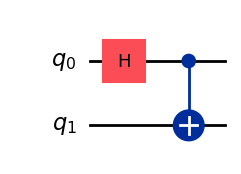

In [68]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.draw(output='mpl');

In [69]:
# simulator = AerSimulator()
# compiled_circuit = transpile(circuit, simulator)
# sim_result = simulator.run(compiled_circuit).result()
# plot_histogram(sim_result.get_counts());

In [70]:
import os
from dotenv import find_dotenv, load_dotenv
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit.providers import *

load_dotenv()

QiskitRuntimeService.save_account(channel='ibm_quantum', token=os.environ.get("IBM_TOKEN"), overwrite=True)

In [71]:
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
pm = generate_preset_pass_manager(backend=backend)
isa_circuit = pm.run(circuit)

TranspilerError: 'Invalid plugin name ibm_dynamic_circuits for stage translation'

In [59]:
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1024  # Options can be set using auto-complete.
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")
pub_result = job.result()[0]
print(f"Counts for the meas output register: {pub_result.data.meas.get_counts()}")

IBMInputValueError: 'The instruction h on qubits (0,) is not supported by the target system. Circuits that do not match the target hardware definition are no longer supported after March 4, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/guides/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/guides/primitives-examples) to see this coupled with operator transformations.'